`Data transformation`

cleaning: handle missing values

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

load extracted data

In [9]:
df = pd.read_csv("C:/Users/USER/Downloads/Data Warehousing/sales_data.csv", parse_dates=['date', 'last_updated'])
df.head()

,id,customers,date,amount,last_updated
0,1233,BestBuy,2025-04-01,1215,2025-04-01 01:47:11
1,7614,Target,2025-04-01,1574,2025-04-01 15:02:29
2,9363,Walmart,2025-04-01,1518,2025-04-01 09:11:31
3,9527,Amazon,2025-04-01,1090,2025-04-01 21:50:45
4,1645,eBay,2025-04-01,735,2025-04-01 04:05:36


inspect data

In [10]:
df.info()
print(df.describe())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            263 non-null    int64         
 1   customers     263 non-null    object        
 2   date          263 non-null    datetime64[ns]
 3   amount        263 non-null    int64         
 4   last_updated  263 non-null    datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(1)
memory usage: 10.4+ KB
                id                           date       amount  \
count   263.000000                            263   263.000000   
mean   5356.676806  2025-04-30 12:13:41.292775680  1051.737643   
min    1051.000000            2025-04-01 00:00:00   103.000000   
25%    2939.500000            2025-04-15 00:00:00   608.000000   
50%    5203.000000            2025-04-30 00:00:00  1043.000000   
75%    7534.500000            2025-05-15 00:00:00  1526.000000   
max    9989.00

handle missing values

In [11]:
df['amount'].fillna(df['amount'].mean(), inplace=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_21696\2333057142.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['amount'].fillna(df['amount'].mean(), inplace=True)


remove duplicates

In [12]:

df.drop_duplicates(subset=['id','date'], inplace=True)

standardize and enrich data

In [24]:
df['customers'] = df['customers'].str.title()


Extract date parts

In [22]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['day_of_week'] = df['date'].dt.day_name()
print(df[['date', 'year', 'month', 'day', 'day_of_week']].head())

        date  year  month  day day_of_week
0 2025-04-01  2025      4    1     Tuesday
1 2025-04-01  2025      4    1     Tuesday
2 2025-04-01  2025      4    1     Tuesday
3 2025-04-01  2025      4    1     Tuesday
4 2025-04-01  2025      4    1     Tuesday


create derived metrics

categorize transaction size

In [21]:
def categorize_sales(x):
    if x< 1500:
        return 'High'
    elif x>= 700:
        return 'Medium'
    else:
        return 'Low'
    
df['sales_category'] = df['amount'].apply(categorize_sales)
print(df['sales_category'].value_counts())

sales_category
High      190
Medium     73
Name: count, dtype: int64


compute daily total per customer

In [16]:
daily_summary = df.groupby(['date', 'customers'])['amount'].sum().reset_index()
daily_summary.rename(columns={'amount': 'daily_total'}, inplace=True)
daily_summary.head()


,date,customers,daily_total
0,2025-04-01,Amazon,1090
1,2025-04-01,Bestbuy,1215
2,2025-04-01,Ebay,735
3,2025-04-01,Target,1574
4,2025-04-01,Walmart,2078


merge or join  aggregated data back

In [17]:
df = df.merge(daily_summary, on=['date', 'customers'], how='left')


visualizations

daily sales trend

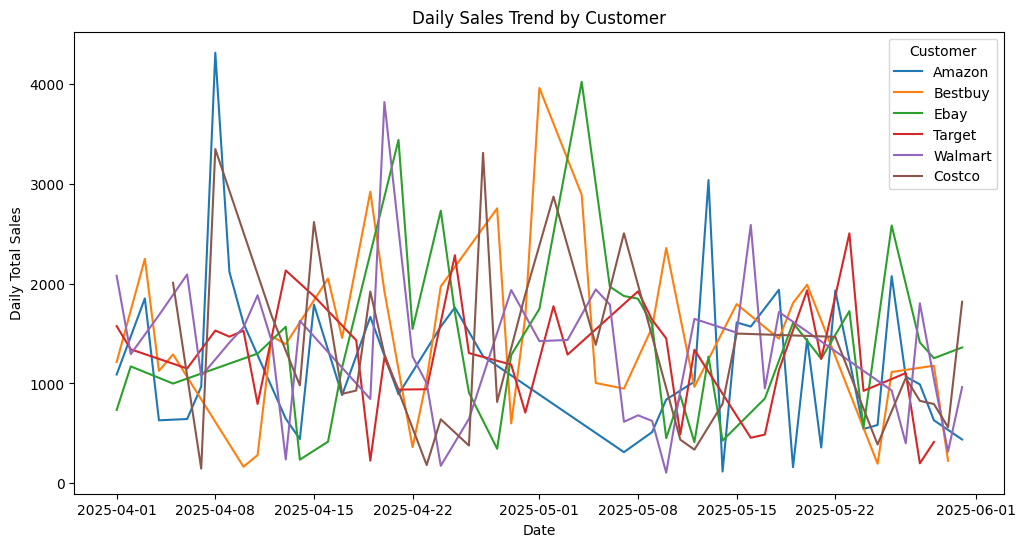

In [18]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_summary, x='date', y='daily_total', hue='customers')
plt.title("Daily Sales Trend by Customer")
plt.xlabel("Date")
plt.ylabel("Daily Total Sales")
plt.legend(title='Customer')
plt.show()

average sales per category

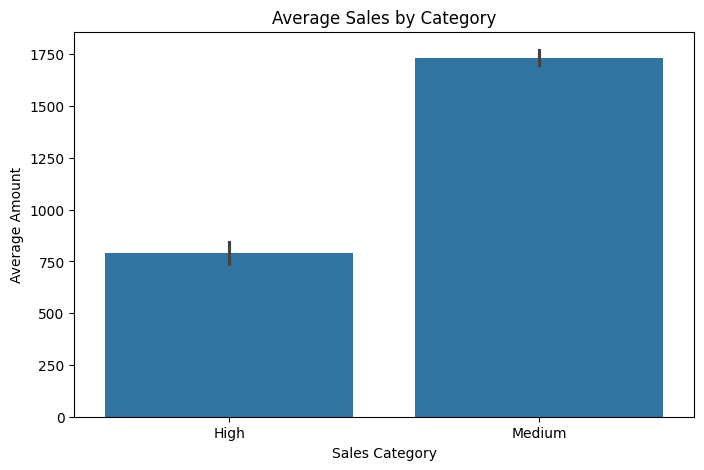

In [19]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='sales_category', y='amount', estimator=np.mean)
plt.title("Average Sales by Category")
plt.xlabel("Sales Category")
plt.ylabel("Average Amount")
plt.show()

save transformed data

In [20]:

df.to_csv("transformed_sales_data.csv", index=False)